<a href="https://www.kaggle.com/code/kireetibabu/ai-club-task?scriptVersionId=246429409" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

plt.style.use('ggplot')


In [2]:
df = pd.read_csv('/kaggle/input/ragnarok-sports/sports.csv')

In [3]:
df.shape

(7582, 19)

In [4]:
df.head

<bound method NDFrame.head of                                      event       date                location  \
0     UFC Fight Night: Ribas vs. Namajunas  3/23/2024  Las Vegas, Nevada, USA   
1     UFC Fight Night: Ribas vs. Namajunas  3/23/2024  Las Vegas, Nevada, USA   
2     UFC Fight Night: Ribas vs. Namajunas  3/23/2024  Las Vegas, Nevada, USA   
3     UFC Fight Night: Ribas vs. Namajunas  3/23/2024  Las Vegas, Nevada, USA   
4     UFC Fight Night: Ribas vs. Namajunas  3/23/2024  Las Vegas, Nevada, USA   
...                                    ...        ...                     ...   
7577                                   NaN        NaN                     NaN   
7578                                   NaN        NaN                     NaN   
7579                                   NaN        NaN                     NaN   
7580                                   NaN        NaN                     NaN   
7581                                   NaN        NaN                     NaN  

In [5]:
df.columns

Index(['event', 'date', 'location', 'r_fighter', 'b_fighter', 'status', 'r_kd',
       'b_kd', 'r_str', 'b_str', 'r_td', 'b_td', 'r_sub', 'b_sub',
       'weight_class', 'method', 'method_detailed', 'round', 'time'],
      dtype='object')

In [6]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7577     True
7578     True
7579     True
7580     True
7581     True
Length: 7582, dtype: bool

In [7]:
df = df.loc[~df.duplicated()]

In [8]:
df = df.loc[~df.duplicated()] \
    .reset_index(drop=True).copy()

In [9]:
df.shape

(7498, 19)

In [10]:
df.loc[df.duplicated(subset=['r_fighter'])]

,event,date,location,r_fighter,b_fighter,status,r_kd,b_kd,r_str,b_str,r_td,b_td,r_sub,b_sub,weight_class,method,method_detailed,round,time
160,UFC Fight Night: Allen vs. Craig,11/18/2023,"Las Vegas, Nevada, USA",Payton Talbott,Nick Aguirre,win,0.0,0.0,28.0,5.0,0.0,2.0,1.0,0.0,Bantamweight,SUB,Rear Naked Choke,3.0,0:58
165,UFC Fight Night: Allen vs. Craig,11/18/2023,"Las Vegas, Nevada, USA",Christian Leroy Duncan,Denis Tiuliulin,win,1.0,0.0,65.0,30.0,0.0,0.0,0.0,0.0,Middleweight,KO/TKO,Punches,2.0,4:24
166,UFC Fight Night: Allen vs. Craig,11/18/2023,"Las Vegas, Nevada, USA",Mick Parkin,Caio Machado,win,0.0,0.0,39.0,76.0,3.0,0.0,0.0,0.0,Heavyweight,U-DEC,NaN,3.0,5:00
175,UFC 295: Prochazka vs. Pereira,11/11/2023,"New York City, New York, USA",Steve Erceg,Alessandro Costa,win,0.0,0.0,74.0,54.0,1.0,1.0,1.0,0.0,Flyweight,U-DEC,NaN,3.0,5:00
180,UFC 295: Prochazka vs. Pereira,11/11/2023,"New York City, New York, USA",Joshua Van,Kevin Borjas,win,0.0,0.0,156.0,75.0,2.0,0.0,0.0,0.0,Flyweight,U-DEC,NaN,3.0,5:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7488,UFC 2: No Way Out,3/11/1994,"Denver, Colorado, USA",Patrick Smith,Scott Morris,win,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,Open Weight,KO/TKO,Elbows,1.0,0:30
7489,UFC 2: No Way Out,3/11/1994,"Denver, Colorado, USA",Royce Gracie,Minoki Ichihara,win,0.0,0.0,2.0,3.0,1.0,0.0,2.0,0.0,Open Weight,SUB,Armbar,1.0,5:08
7491,UFC 2: No Way Out,3/11/1994,"Denver, Colorado, USA",Remco Pardoel,Alberta Cerra Leon,win,0.0,0.0,4.0,1.0,1.0,0.0,1.0,0.0,Open Weight,SUB,Ezekiel Choke,1.0,9:51
7494,UFC 2: No Way Out,3/11/1994,"Denver, Colorado, USA",Johnny Rhodes,David Levicki,win,0.0,0.0,11.0,4.0,1.0,0.0,0.0,0.0,Open Weight,KO/TKO,Punches,1.0,12:13


In [11]:
df.query('r_fighter == "Patrick Smith"')

,event,date,location,r_fighter,b_fighter,status,r_kd,b_kd,r_str,b_str,r_td,b_td,r_sub,b_sub,weight_class,method,method_detailed,round,time
7451,UFC 6: Clash of the Titans,7/14/1995,"Casper, Wyoming, USA",Patrick Smith,Rudyard Moncayo,win,1.0,0.0,6.0,0.0,2.0,0.0,1.0,0.0,Open Weight,SUB,Rear Naked Choke,1.0,1:08
7484,UFC 2: No Way Out,3/11/1994,"Denver, Colorado, USA",Patrick Smith,Johnny Rhodes,win,0.0,0.0,5.0,4.0,0.0,0.0,1.0,0.0,Open Weight,SUB,Guillotine Choke,1.0,1:07
7488,UFC 2: No Way Out,3/11/1994,"Denver, Colorado, USA",Patrick Smith,Scott Morris,win,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,Open Weight,KO/TKO,Elbows,1.0,0:30
7495,UFC 2: No Way Out,3/11/1994,"Denver, Colorado, USA",Patrick Smith,Ray Wizard,win,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,Open Weight,SUB,Guillotine Choke,1.0,0:58


# Sample Question 1


In [12]:
df['weight_class'].value_counts()

weight_class
Lightweight              1298
Welterweight             1253
Middleweight              996
Featherweight             719
Heavyweight               686
Light Heavyweight         658
Bantamweight              639
Flyweight                 327
Women's Strawweight       292
Women's Flyweight         219
Women's Bantamweight      199
Open Weight               117
Catch Weight               64
Women's Featherweight      29
Super Heavyweight           1
Name: count, dtype: int64

In [13]:
df.sort_values('weight_class', ascending = 1)

,event,date,location,r_fighter,b_fighter,status,r_kd,b_kd,r_str,b_str,r_td,b_td,r_sub,b_sub,weight_class,method,method_detailed,round,time
5850,UFC 132: Cruz vs Faber,7/2/2011,"Las Vegas, Nevada, USA",Jeff Hougland,Donny Walker,win,0.0,0.0,61.0,31.0,1.0,0.0,4.0,2.0,Bantamweight,U-DEC,NaN,3.0,5:00
5960,UFC 126: Silva vs Belfort,2/5/2011,"Las Vegas, Nevada, USA",Demetrious Johnson,Norifumi Yamamoto,win,0.0,0.0,38.0,16.0,10.0,0.0,0.0,0.0,Bantamweight,U-DEC,NaN,3.0,5:00
5957,UFC 126: Silva vs Belfort,2/5/2011,"Las Vegas, Nevada, USA",Miguel Torres,Antonio Banuelos,win,0.0,0.0,73.0,10.0,0.0,0.0,0.0,0.0,Bantamweight,U-DEC,NaN,3.0,5:00
2154,UFC Fight Night: Zabit vs. Kattar,11/9/2019,"Moscow, Moscow, Russia",Davey Grant,Grigory Popov,win,0.0,0.0,30.0,35.0,6.0,0.0,0.0,0.0,Bantamweight,S-DEC,NaN,3.0,5:00
2186,UFC Fight Night: Reyes vs. Weidman,10/18/2019,"Boston, Massachusetts, USA",Randy Costa,Boston Salmon,win,2.0,0.0,22.0,12.0,0.0,0.0,0.0,0.0,Bantamweight,KO/TKO,Punch,1.0,2:15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2672,UFC Fight Night: Blaydes vs. Ngannou 2,11/24/2018,"Beijing, China",Zhang Weili,Jessica Aguilar,win,0.0,0.0,45.0,9.0,1.0,0.0,2.0,0.0,Women's Strawweight,SUB,Armbar,1.0,3:41
2674,UFC Fight Night: Blaydes vs. Ngannou 2,11/24/2018,"Beijing, China",Yan Xiaonan,Syuri Kondo,win,0.0,0.0,150.0,86.0,0.0,0.0,0.0,0.0,Women's Strawweight,U-DEC,NaN,3.0,5:00
2693,UFC Fight Night: Korean Zombie vs. Rodriguez,11/10/2018,"Denver, Colorado, USA",Maycee Barber,Hannah Cifers,win,0.0,0.0,68.0,41.0,1.0,0.0,0.0,0.0,Women's Strawweight,KO/TKO,Punches,2.0,2:01
3748,UFC 201: Lawler vs. Woodley,7/30/2016,"Atlanta, Georgia, USA",Karolina Kowalkiewicz,Rose Namajunas,win,0.0,0.0,84.0,70.0,0.0,2.0,0.0,0.0,Women's Strawweight,S-DEC,NaN,3.0,5:00


In [14]:


df['performance'] = (df['r_str'] + df['b_str'])/2
df

,event,date,location,r_fighter,b_fighter,status,r_kd,b_kd,r_str,b_str,r_td,b_td,r_sub,b_sub,weight_class,method,method_detailed,round,time,performance
0,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Rose Namajunas,Amanda Ribas,win,0.0,0.0,93.0,83.0,1.0,4.0,0.0,0.0,Women's Flyweight,U-DEC,NaN,5.0,5:00,88.0
1,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Karl Williams,Justin Tafa,win,0.0,0.0,40.0,21.0,7.0,0.0,1.0,0.0,Heavyweight,U-DEC,NaN,3.0,5:00,30.5
2,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Edmen Shahbazyan,AJ Dobson,win,1.0,0.0,27.0,15.0,1.0,0.0,0.0,0.0,Middleweight,KO/TKO,Punches,1.0,4:33,21.0
3,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Payton Talbott,Cameron Saaiman,win,1.0,0.0,79.0,31.0,0.0,0.0,0.0,0.0,Bantamweight,KO/TKO,Punches,2.0,0:21,55.0
4,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Youssef Zalal,Billy Quarantillo,win,0.0,0.0,33.0,10.0,2.0,0.0,2.0,0.0,Featherweight,SUB,Rear Naked Choke,2.0,1:50,21.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7493,UFC 2: No Way Out,3/11/1994,"Denver, Colorado, USA",Frank Hamaker,Thaddeus Luster,win,0.0,0.0,2.0,0.0,1.0,0.0,3.0,0.0,Open Weight,SUB,Keylock,1.0,4:52,1.0
7494,UFC 2: No Way Out,3/11/1994,"Denver, Colorado, USA",Johnny Rhodes,David Levicki,win,0.0,0.0,11.0,4.0,1.0,0.0,0.0,0.0,Open Weight,KO/TKO,Punches,1.0,12:13,7.5
7495,UFC 2: No Way Out,3/11/1994,"Denver, Colorado, USA",Patrick Smith,Ray Wizard,win,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,Open Weight,SUB,Guillotine Choke,1.0,0:58,1.0
7496,UFC 2: No Way Out,3/11/1994,"Denver, Colorado, USA",Scott Morris,Sean Daugherty,win,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,Open Weight,SUB,Guillotine Choke,1.0,0:20,0.5


In [15]:
ax = df.groupby(['weight_class']).mean(['performance'])

ax

,r_kd,b_kd,r_str,b_str,r_td,b_td,r_sub,b_sub,round,performance
weight_class,,,,,,,,,,
Bantamweight,0.441315,0.067293,49.225352,33.230047,1.461659,0.760563,0.521127,0.233177,2.467919,41.227700
Catch Weight,0.281250,0.109375,52.875000,35.234375,1.937500,0.578125,0.609375,0.109375,2.375000,44.054688
Featherweight,0.378303,0.062587,50.424200,34.475661,1.623088,0.741307,0.592490,0.260083,2.495132,42.449930
Flyweight,0.376147,0.061162,44.287462,31.342508,1.954128,0.944954,0.737003,0.259939,2.492355,37.814985
Heavyweight,0.429825,0.058480,35.489766,21.584795,1.039474,0.421053,0.346491,0.169591,2.056851,28.537281
Light Heavyweight,0.452888,0.065350,39.384498,24.402736,1.343465,0.524316,0.386018,0.164134,2.202128,31.893617
Lightweight,0.338485,0.059505,41.587326,27.840031,1.589645,0.731066,0.593509,0.312983,2.347458,34.713679
Middleweight,0.389558,0.075301,38.153614,24.424699,1.331325,0.692771,0.567269,0.269076,2.260040,31.289157
Open Weight,0.117647,0.009804,9.833333,3.764706,0.637255,0.205882,0.774510,0.107843,1.094017,6.799020


<function matplotlib.pyplot.show(close=None, block=None)>

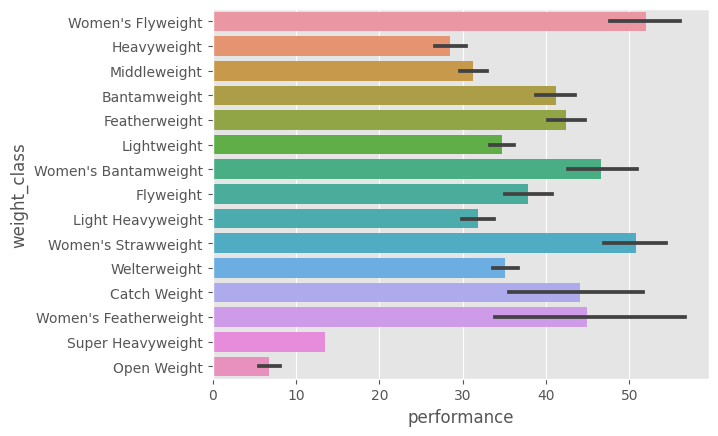

In [16]:
sns.barplot(y='weight_class', x='performance', data=df)
plt.show

In [17]:
bx = df.sort_values(['performance',], ascending = [0]) \
   .head(50) 
bx

,event,date,location,r_fighter,b_fighter,status,r_kd,b_kd,r_str,b_str,r_td,b_td,r_sub,b_sub,weight_class,method,method_detailed,round,time,performance
1633,UFC Fight Night: Holloway vs. Kattar,1/16/2021,"Abu Dhabi, Abu Dhabi, United Arab Emirates",Max Holloway,Calvin Kattar,win,0.0,0.0,445.0,133.0,0.0,0.0,0.0,0.0,Featherweight,U-DEC,NaN,5.0,5:00,289.0
971,UFC Fight Night: Font vs. Vera,4/30/2022,"Las Vegas, Nevada, USA",Marlon Vera,Rob Font,win,3.0,0.0,159.0,271.0,0.0,1.0,0.0,0.0,Bantamweight,U-DEC,NaN,5.0,5:00,215.0
2627,UFC 231: Holloway vs. Ortega,12/8/2018,"Toronto, Ontario, Canada",Max Holloway,Brian Ortega,win,0.0,0.0,290.0,110.0,1.0,2.0,0.0,0.0,Featherweight,KO/TKO,NaN,4.0,5:00,200.0
393,UFC Fight Night: Vettori vs. Cannonier,6/17/2023,"Las Vegas, Nevada, USA",Jared Cannonier,Marvin Vettori,win,0.0,0.0,241.0,153.0,4.0,1.0,0.0,0.0,Middleweight,U-DEC,NaN,5.0,5:00,197.0
1192,UFC Fight Night: Holloway vs. Rodriguez,11/13/2021,"Las Vegas, Nevada, USA",Max Holloway,Yair Rodriguez,win,0.0,0.0,230.0,159.0,3.0,1.0,1.0,0.0,Featherweight,U-DEC,NaN,5.0,5:00,194.5
2466,UFC 236: Holloway vs. Poirier 2,4/13/2019,"Atlanta, Georgia, USA",Dustin Poirier,Max Holloway,win,0.0,0.0,178.0,181.0,1.0,0.0,0.0,1.0,Lightweight,U-DEC,NaN,5.0,5:00,179.5
1206,UFC 268: Usman vs. Covington 2,11/6/2021,"New York City, New York, USA",Shane Burgos,Billy Quarantillo,win,0.0,0.0,193.0,164.0,0.0,0.0,0.0,0.0,Featherweight,U-DEC,NaN,3.0,5:00,178.5
1231,UFC Fight Night: Costa vs. Vettori,10/23/2021,"Las Vegas, Nevada, USA",Marvin Vettori,Paulo Costa,win,0.0,0.0,190.0,163.0,1.0,1.0,0.0,0.0,Light Heavyweight,U-DEC,NaN,5.0,5:00,176.5
2011,UFC 248: Adesanya vs. Romero,3/7/2020,"Las Vegas, Nevada, USA",Zhang Weili,Joanna Jedrzejczyk,win,0.0,0.0,165.0,186.0,1.0,0.0,0.0,0.0,Women's Strawweight,S-DEC,NaN,5.0,5:00,175.5
1099,UFC 271: Adesanya vs. Whittaker 2,2/12/2022,"Houston, Texas, USA",Casey O'Neill,Roxanne Modafferi,win,0.0,0.0,229.0,120.0,0.0,2.0,0.0,0.0,Women's Flyweight,S-DEC,NaN,3.0,5:00,174.5


In [18]:
bx['location'].value_counts()

location
Las Vegas, Nevada, USA                        25
Toronto, Ontario, Canada                       3
Abu Dhabi, Abu Dhabi, United Arab Emirates     2
Dallas, Texas, USA                             2
Anaheim, California, USA                       2
Rio de Janeiro, Rio de Janeiro, Brazil         2
Mexico City, Distrito Federal, Mexico          1
Manchester, England, United Kingdom            1
Jacksonville, Florida, USA                     1
Miami, Florida, USA                            1
Sydney, New South Wales, Australia             1
Boston, Massachusetts, USA                     1
Melbourne, Victoria, Australia                 1
Nashville, Tennessee, USA                      1
Phoenix, Arizona, USA                          1
Shenzhen, Guangdong, China                     1
Houston, Texas, USA                            1
New York City, New York, USA                   1
Atlanta, Georgia, USA                          1
Glendale, Arizona, USA                         1
Name: count

In [19]:
bx['method'].value_counts()

method
U-DEC     35
S-DEC      8
KO/TKO     6
M-DEC      1
Name: count, dtype: int64

In [20]:
bx['weight_class'].value_counts()

weight_class
Featherweight           10
Bantamweight             7
Lightweight              7
Middleweight             6
Welterweight             6
Light Heavyweight        3
Women's Strawweight      3
Women's Flyweight        3
Women's Bantamweight     3
Flyweight                1
Heavyweight              1
Name: count, dtype: int64

In [21]:
bx['method_detailed'].value_counts()

method_detailed
Punch      2
Punches    2
Knee       1
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

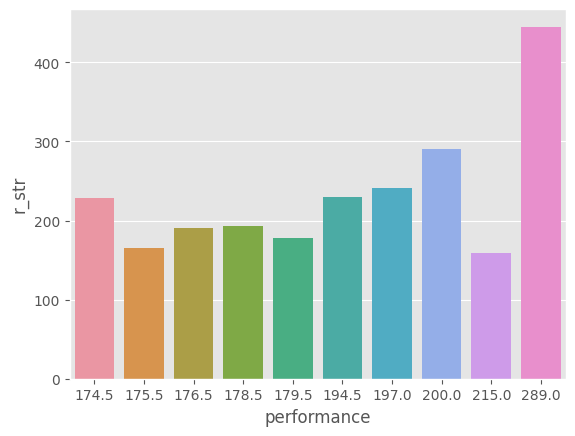

In [22]:
cx = df.sort_values(['performance',], ascending = [0]) \
   .head(10) 

sns.barplot(x='performance', y='r_str', data= cx)
plt.show



<function matplotlib.pyplot.show(close=None, block=None)>

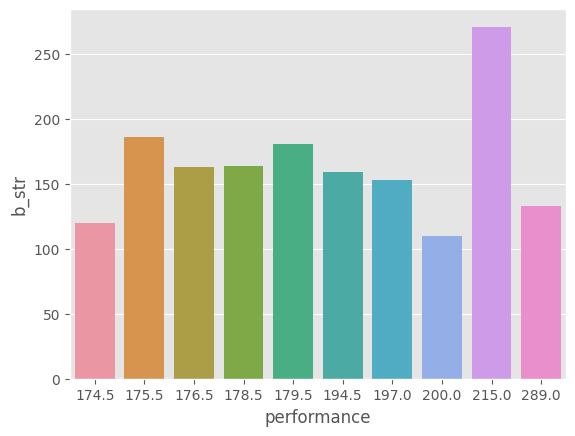

In [23]:
sns.barplot(x='performance', y='b_str', data= cx)
plt.show

Common characteristics of top performers:
* Most are peformed in Las Vegas, Nevada, USA .
* Most of them used U-DEC Method
* Most of the top-performers are belonged to Featherweight followed by Bantamweight and Lightweight.
* Most of their methods are by punches. 
* Most of them played upto round 5.




# Sample Question 2

In [24]:
df['location'].value_counts()

location
Las Vegas, Nevada, USA                        2475
Abu Dhabi, Abu Dhabi, United Arab Emirates     193
London, England, United Kingdom                168
Anaheim, California, USA                       105
Houston, Texas, USA                            103
                                              ... 
Dothan, Alabama, USA                             9
San Juan, Puerto Rico                            9
Bossier City, Louisiana, USA                     7
Chiba, Japan                                     7
Yokohama, Kanagawa, Japan                        6
Name: count, Length: 168, dtype: int64

*  Most are peformed in Las Vegas, Nevada, USA . So, it seems to have an advantage playing in Las Vegas, Nevada, USA.

# Sample Question 3


In [25]:
df

,event,date,location,r_fighter,b_fighter,status,r_kd,b_kd,r_str,b_str,r_td,b_td,r_sub,b_sub,weight_class,method,method_detailed,round,time,performance
0,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Rose Namajunas,Amanda Ribas,win,0.0,0.0,93.0,83.0,1.0,4.0,0.0,0.0,Women's Flyweight,U-DEC,NaN,5.0,5:00,88.0
1,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Karl Williams,Justin Tafa,win,0.0,0.0,40.0,21.0,7.0,0.0,1.0,0.0,Heavyweight,U-DEC,NaN,3.0,5:00,30.5
2,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Edmen Shahbazyan,AJ Dobson,win,1.0,0.0,27.0,15.0,1.0,0.0,0.0,0.0,Middleweight,KO/TKO,Punches,1.0,4:33,21.0
3,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Payton Talbott,Cameron Saaiman,win,1.0,0.0,79.0,31.0,0.0,0.0,0.0,0.0,Bantamweight,KO/TKO,Punches,2.0,0:21,55.0
4,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Youssef Zalal,Billy Quarantillo,win,0.0,0.0,33.0,10.0,2.0,0.0,2.0,0.0,Featherweight,SUB,Rear Naked Choke,2.0,1:50,21.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7493,UFC 2: No Way Out,3/11/1994,"Denver, Colorado, USA",Frank Hamaker,Thaddeus Luster,win,0.0,0.0,2.0,0.0,1.0,0.0,3.0,0.0,Open Weight,SUB,Keylock,1.0,4:52,1.0
7494,UFC 2: No Way Out,3/11/1994,"Denver, Colorado, USA",Johnny Rhodes,David Levicki,win,0.0,0.0,11.0,4.0,1.0,0.0,0.0,0.0,Open Weight,KO/TKO,Punches,1.0,12:13,7.5
7495,UFC 2: No Way Out,3/11/1994,"Denver, Colorado, USA",Patrick Smith,Ray Wizard,win,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,Open Weight,SUB,Guillotine Choke,1.0,0:58,1.0
7496,UFC 2: No Way Out,3/11/1994,"Denver, Colorado, USA",Scott Morris,Sean Daugherty,win,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,Open Weight,SUB,Guillotine Choke,1.0,0:20,0.5


In [26]:
df['Striking'] = df['r_str'] + df['b_str']
dx = df.sort_values(['Striking',], ascending = [0]) \
   .head(1000)


In [27]:
dx['status'].value_counts()

status
win     987
draw     13
Name: count, dtype: int64

* Winning % in 100 = 99.0
            in 500 = 99.2
            in 1000 = 98.7
         

In [28]:
df['grappler'] = df['r_td'] + df['b_td']
ex = df.sort_values(['grappler'], ascending = [0]) \
   .head(1000)

In [29]:
ex['status'].value_counts()

status
win     985
draw     15
Name: count, dtype: int64

* Winning % in 100 = 98.0
            in 500 = 98.2
            in 1000 = 98.5

* Here Maximum there is no major difference in winning on comparison style counter phenomenon, where specific fighting styles (striker vs. grappler). But if we want to say in particular there is slight chance of STRIKER to WIN.